---

## Parte 2: Actividades posteriores por grupos

Cada grupo debe elegir un nuevo dataset y aplicar K-Means o una técnica alternativa como DBSCAN o Agglomerative Clustering. Aquí algunos casos sugeridos:

---

### Ejercicio 1: Segmentación de vinos

- **Objetivo:** Agrupar distintos tipos de vino en función de sus características químicas.
- **Extensión:** Comparar resultados de K-Means con clustering jerárquico.

```python
from sklearn.datasets import load_wine
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target

df.head()
```

---

### Ejercicio 2: Agrupamiento de países por desarrollo humano

- **Objetivo:** Agrupar países según indicadores como educación, ingreso, esperanza de vida.
- **Extensión:** Analizar similitudes regionales y brechas globales.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/bromero26/human-development-index/master/hdi_human_development_index.csv"
df = pd.read_csv(url)

# Seleccionar columnas más recientes (por ej. 'geo', '2015' o '2019')
df = df[['geo', '2015']].dropna()
df.head()
```

---

### Ejercicio 3: Agrupamiento de canciones por características musicales

- **Objetivo:** Agrupar canciones según tempo, energía, baileabilidad, etc.
- **Extensión:** Proponer una playlist personalizada para cada cluster.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

# Seleccionar variables musicales relevantes
df = df[["danceability","energy","tempo","valence","loudness"]].dropna()

df.head()
```

---

### Ejercicio 4: Segmentación de estudiantes

- **Objetivo:** Agrupar estudiantes según hábitos de estudio, rendimiento y contexto social.
- **Extensión:** Proponer estrategias de apoyo personalizadas para cada grupo.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/yogeshsachdeva223/Student_mat_exploration_and_visualisation/main/student-mat.csv"
df = pd.read_csv(url)

# Verificar estructura
df.head()
```

---

## Recomendaciones para grupos

1. **Analicen bien las variables:** ¿Cuáles son numéricas, cuáles deben codificarse?
2. **Visualicen sus clusters:** Con `PCA`, `t-SNE` o `Seaborn pairplot`.
3. **Interpreten los resultados:** ¿Qué patrones encontraron? ¿Qué caracteriza a cada grupo?
4. **Propongan acciones concretas:** Desde marketing a intervenciones educativas.


## Ejercicio 1: Segmentación de vinos

Se realizo 2 veces. Solo cambia el orden y composision de la conclusión.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


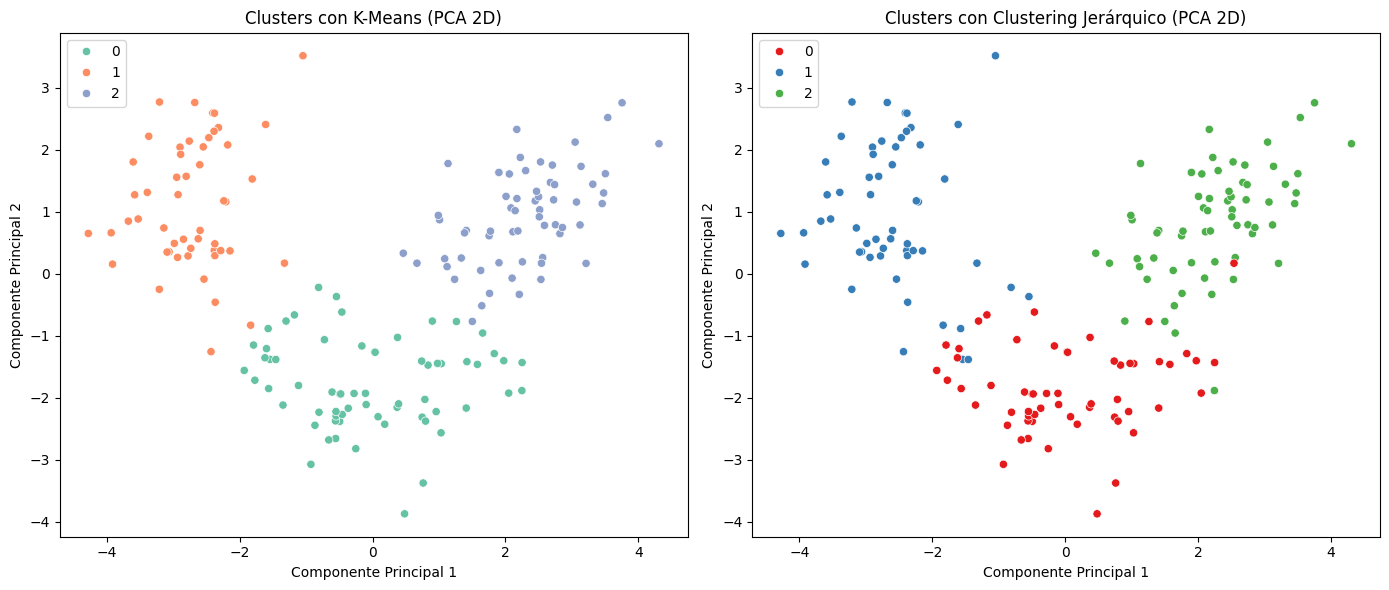

In [ ]:
# Importar librerías necesarias
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns


# Escalar los datos (sin la columna target)
X = df.drop("target", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means clustering con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Clustering jerárquico (agglomerative)
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

# Visualización de resultados con PCA (2D)
plt.figure(figsize=(14, 6))

# Gráfico K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("Clusters con K-Means (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

# Gráfico Agglomerative
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, palette='Set1')
plt.title("Clusters con Clustering Jerárquico (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.tight_layout()
plt.show()


Claro, aquí tienes una **pequeña explicación del código** y una **conclusión clara y breve** que puedes agregar como comentario o incluir en tu informe:

---

### 🧠 Explicación del código

1. Importar librerías necesarias

Se importan todas las librerías requeridas para procesamiento de datos, clustering, reducción de dimensiones y visualización.

2. Escalar los datos (sin la columna target)

Se eliminan las etiquetas originales (`target`) para aplicar clustering sin supervisión. Luego, se normalizan los datos usando `StandardScaler` para que todas las variables tengan la misma escala.

3. Aplicar PCA para reducir a 2 dimensiones

Se utiliza PCA (Análisis de Componentes Principales) para reducir los datos a 2 dimensiones, facilitando la visualización de los clusters.

4. K-Means clustering con k=3 & Clustering jerárquico (agglomerative)

Se aplican dos algoritmos de clustering no supervisado:

* **K-Means**: agrupa los datos en 3 clusters buscando minimizar la distancia a los centroides.
* **Agglomerative Clustering**: une observaciones en forma jerárquica hasta formar 3 grupos.

5. Visualización de resultados con PCA (2D)

Se grafican los resultados de ambos algoritmos en el espacio PCA. Esto permite observar cómo se distribuyen los clusters en un plano bidimensional y comparar visualmente los resultados.

---

### ✅ Conclusión

Ambos algoritmos de clustering, **K-Means** y **Agglomerative Clustering**, lograron agrupar los vinos en tres grupos diferenciados en base a sus características químicas.

La reducción de dimensiones mediante PCA facilitó la visualización de estos grupos, mostrando que los datos presentan una **estructura subyacente clara**. Aunque las formas de los clusters son diferentes, ambos métodos evidencian patrones consistentes que podrían corresponderse con los tipos reales de vino (`target`). Esto sugiere que el conjunto de características químicas es **informativo y útil para segmentar** vinos de forma no supervisada.

---

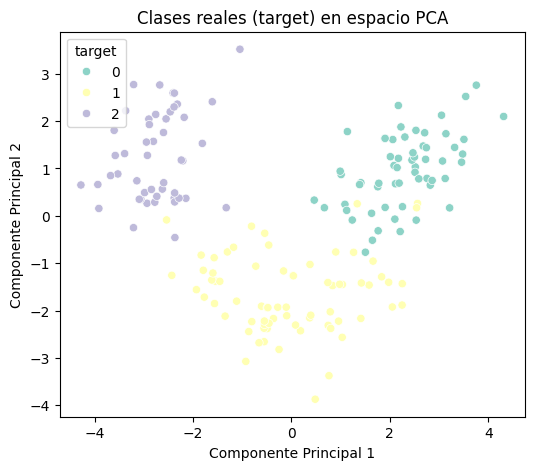

In [ ]:
# Visualización de clases reales
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["target"], palette='Set3')
plt.title("Clases reales (target) en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


---
---
---

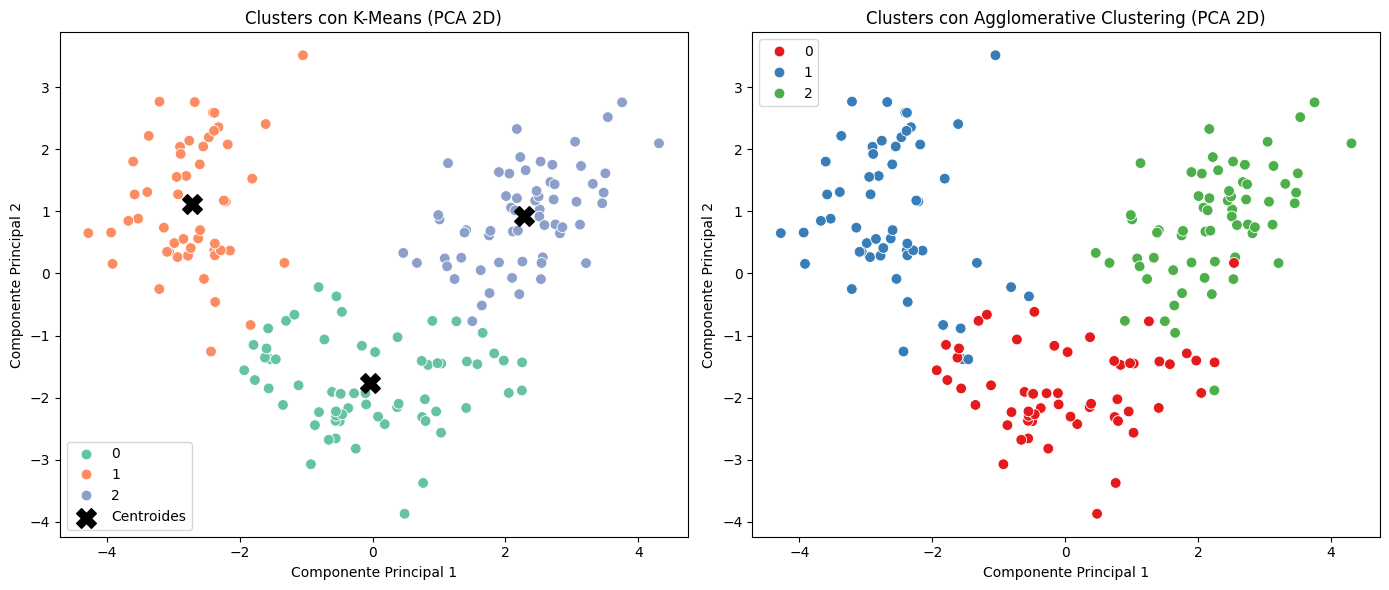

🔍 Medias de características químicas por cluster (K-Means):



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster_Agglo
Cluster_KMeans,,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,0.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,1.000000
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,1.967742


🔍 Medias de características químicas por cluster (Agglomerative Clustering):



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster_KMeans
Cluster_Agglo,,,,,,,,,,,,,,
0,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034,0.034483
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429,0.910714
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875,1.906250


In [ ]:
# 1. Importar librerías necesarias
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar datos del vino
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 3. Escalar los datos (todas las características químicas)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 4. Aplicar PCA para reducir dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 6. Aplicar Clustering Jerárquico
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

# 7. Agregar resultados al DataFrame original
df_kmeans = df.copy()
df_kmeans['Cluster_KMeans'] = kmeans_labels
df_kmeans['Cluster_Agglo'] = agglo_labels

# 8. Visualizar clustering con PCA + centroides de K-Means
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(14, 6))

# Gráfico K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2', s=60)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='X', s=200, label='Centroides')
plt.title("Clusters con K-Means (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()

# Gráfico Clustering Jerárquico
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, palette='Set1', s=60)
plt.title("Clusters con Agglomerative Clustering (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.tight_layout()
plt.show()

# 9. Interpretación: calcular medias por cluster (K-Means)
cluster_means = df_kmeans.groupby("Cluster_KMeans").mean()
print("🔍 Medias de características químicas por cluster (K-Means):\n")
display(cluster_means)

# 10. Interpretación: calcular medias por cluster (Agglomerative Clustering)
cluster_means_agglo = df_kmeans.groupby("Cluster_Agglo").mean()
print("🔍 Medias de características químicas por cluster (Agglomerative Clustering):\n")
display(cluster_means_agglo)



Este análisis agrupa vinos únicamente en base a sus características químicas (sin considerar la variable target que indica la clase real del vino).

1. Se aplicó escalamiento para que todas las características tengan igual peso.

2. Se usó PCA para reducir dimensiones a 2 ejes y poder visualizar.

3. Se aplicaron dos técnicas de clustering: **K-Means** y **Agglomerative Clustering.**

Luego se calcularon los promedios de cada característica química por cluster, para analizar las diferencias entre los grupos.


### Conclusión
El análisis reveló que los vinos pueden ser segmentados en grupos diferenciados solo a partir de sus propiedades químicas.

Ambas técnicas (K-Means y Clustering jerárquico) mostraron agrupamientos consistentes al ser visualizados en 2D mediante PCA. Sin embargo tienen ciertas diferencias en las agrupaciones y por lo visto y comparado con los datos originales se puede ver que es mas recomendable para este caso utilizar **Clusters con K-Means y (PCA 2D)**, ya que aunque se equivoca en algunos datos, tiene mas porcentaje de acierto.

Los centroides de K-Means indican el perfil promedio de cada grupo, y los resultados muestran diferencias claras en variables como alcohol, flavanoids o color_intensity. Esto sugiere que estas características son relevantes para distinguir tipos de vino, incluso sin conocer su clase original (target).

Luego se calcularon los promedios de cada característica química por cluster, tanto para K-Means como para Agglomerative Clustering, lo que permitió identificar qué variables químicas distinguen a cada grupo. Esto refuerza la interpretación de los agrupamientos y ayuda a comprender el perfil químico de los vinos en cada segmento.


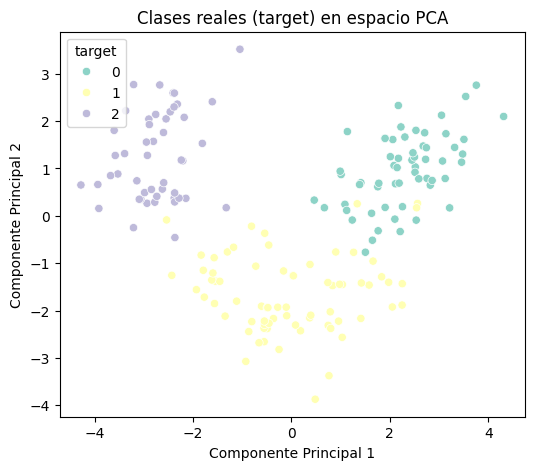

In [ ]:
# Visualización de clases reales

df["target"] = data.target
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["target"], palette='Set3')
plt.title("Clases reales (target) en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Revisar https://surpriselib.com/